In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from IPython.display import clear_output

from tqdm.notebook import tqdm

In [89]:
input_folder = 'inputs\Google'
file = "2. GoogleVision-geral.xlsx"
file_path = os.path.join(input_folder, file)

In [90]:
df = pd.read_excel(file_path)
df.head()

,ID,Class,Percent,Subclass
0,17946532628018131,Event,0.73,item
1,17853670316837543,Event,0.73,item
2,267949976607343_637569997730020,Music artist,0.73,item
3,7135999771256392965,Poster,0.73,item
4,17966582779842208,T-shirt,0.73,item


In [91]:
df = df[['ID', 'Class']].drop_duplicates()
df

,ID,Class
0,17946532628018131,Event
1,17853670316837543,Event
2,267949976607343_637569997730020,Music artist
3,7135999771256392965,Poster
4,17966582779842208,T-shirt
...,...,...
34668,267949976607343_3367895213535874,Exposed
34669,267949976607343_730802951740057,Blurred
34670,267949976607343_730802951740057,Joy
34671,267949976607343_677195593767460,Blurred


In [92]:
df.isna().sum().sum()

0

## 1 - Verificação de Sobreposição entre Tags 

A ideia de "sobreposição" é a ideia básica aplicada na clusterização.(Talvez ja exista essa ideia com outro nome).

A métrica de *"sobreposição de **A** em relação a **B**"* é definida como a cardinalidade da interseção entre A e B sobre a cardinalidade de B.

Esta fórmula expressa a ideia:

$$
\text{overlap(A,B)} = \frac{|A \cap B|}{|B|}
$$

**Métrica 1**: Considerando que Posts(a) representa o conjunto de postagens com a tag "a", podemos definir a *"sobreposição da tag **a** em relação à tag **b**"* assim:

$$
\text{overlap}(a,b) = \frac{|\text{Posts}(a) \cap \text{Posts}(b)|}{\text{Posts}(b)}
$$

In [93]:
tagA = 'Jaw'
tagB = 'Chin'

In [94]:
# df2 is a dataframe with columns 'ID', 'Curtidas' and 'Class'
# below, we filter the IDs that have the tagA/tagB
set_ids_with_tagA = df[df['Class'] == tagA]['ID'].unique()
set_ids_with_tagB = df[df['Class'] == tagB]['ID'].unique()

In [95]:
#set_ids_with_tagA

In [96]:
# find the intersection 
set_ids_with_both_tags = np.intersect1d(set_ids_with_tagA, set_ids_with_tagB)
set_ids_with_both_tags

array(['17873200943737489', '17877255332712627', '17909431823571650',
       '17921971862499833', '17935700144317342', '17942845976505113',
       '17948790929068288', '17954776208120717', '17954876699035026',
       '17966260867706727', '17967022018926239', '17969522296707102',
       '17977075819614009', '17983096618635979', '17989324792575663',
       '17991876490517661', '17999786911482528', '18058229647337655',
       '18064488979317343', '18132403960285972', '18152642095277228',
       '18225919642158702', '18303870943011660', '18311668867002669',
       '211857482296579_612540656890026',
       '211857482296579_624166005727491',
       '211857482296579_635016171309141',
       '211857482296579_642334337243991',
       '211857482296579_655936069217151',
       '211857482296579_668159021328189',
       '211857482296579_668932477917510',
       '211857482296579_680139643463460',
       '211857482296579_698717804938977',
       '211857482296579_730605185083572',
       '267949976607

In [97]:
overlap_A_B = len(set_ids_with_both_tags) / len(set_ids_with_tagB)
overlap_A_B

0.17766497461928935

In [98]:
overlap_B_A = len(set_ids_with_both_tags) / len(set_ids_with_tagA)
overlap_B_A

0.4046242774566474

In [99]:
def overlap_metric1(tagA, tagB, df):
    setA = df[df['Class'] == tagA]['ID'].unique()
    setB = df[df['Class'] == tagB]['ID'].unique()
    set_inter_A_B = np.intersect1d(setA, setB)
    overlap_A_B = len(set_inter_A_B) / len(setB)
    overlap_B_A = len(set_inter_A_B) / len(setA)
    return overlap_A_B, overlap_B_A

In [100]:
overlap_metric1('Jaw', 'Chin', df)

(0.17766497461928935, 0.4046242774566474)

## 2 - Calculando Matriz de Todas as Sobreposições das Tags Filtradas no Teste Estatístico

In [101]:
# tags selecionadas no teste estatístico
df_all_tags_stats = pd.read_excel('inputs/Google/4. Posts+tags-normalizado-geral.xlsx')
#df_all_tags_stats

In [102]:
df_sel_tags_stats = df_all_tags_stats[df_all_tags_stats['P-Value - ts'] < 0.01].copy()

In [103]:
df_sel_tags_stats['Class'].duplicated().sum()

0

In [104]:
df_sel_tags_stats.loc[:, 'Increases Likes'] = df_sel_tags_stats['P-Value - greater'].apply(lambda x: True if x < 0.01 else False)
df_sel_tags_stats.loc[:, 'Decreases Likes'] = df_sel_tags_stats['P-Value - less'].apply(lambda x: True if x < 0.01 else False)
df_sel_tags_stats.head(10)

,Class,P-Value - ts,P-Value - greater,P-Value - less,Increases Likes,Decreases Likes
9,Advertising,5.845791e-03,9.970782e-01,2.922896e-03,False,True
27,Asphalt,4.925808e-05,9.999754e-01,2.462904e-05,False,True
38,Automotive tire,8.201432e-07,9.999996e-01,4.100716e-07,False,True
72,Blazer,6.829489e-08,3.414745e-08,1.000000e+00,True,False
75,Blurred,8.516585e-04,4.258292e-04,9.995742e-01,True,False
109,Car,7.300403e-03,9.963511e-01,3.650202e-03,False,True
115,Chair,4.568834e-06,2.284417e-06,9.999977e-01,True,False
134,Cloud,4.082820e-05,9.999796e-01,2.041410e-05,False,True
136,Coat,6.940507e-06,3.470253e-06,9.999965e-01,True,False
140,Collar,3.676087e-12,1.838044e-12,1.000000e+00,True,False


In [105]:
selected_tags = df_sel_tags_stats['Class'].unique()
selected_tags

array(['Advertising', 'Asphalt', 'Automotive tire', 'Blazer', 'Blurred',
       'Car', 'Chair', 'Cloud', 'Coat', 'Collar', 'Crowd', 'Curtain',
       'Dress shirt', 'Entertainment', 'Event', 'Eyebrow', 'Fan', 'Flag',
       'Font', 'Glove', 'Hair', 'Hairstyle', 'Hand', 'Happy', 'Helmet',
       'Infrastructure', 'Joy', 'Lamp', 'Land vehicle', 'Lighting',
       'Material property', 'Mode of transport', 'Motor vehicle',
       'Motorcycle', 'Muscle', 'Natural landscape', 'Official',
       'Outerwear', 'Pants', 'Person', 'Poster', 'Publication',
       'Screenshot', 'Shelving', 'Shoulder', 'Skin', 'Sky', 'Snapshot',
       'Spokesperson', 'Street light', 'Suit', 'Television presenter',
       'Television program', 'Television studio', 'Textile', 'Tie',
       'Tire', 'Vehicle', 'Wheel', 'Wind instrument', 'Youth'],
      dtype=object)

In [106]:
print("Total de tags:", len(df_all_tags_stats['Class'].unique()))
print("Total de tags selecionadas no teste:", len(selected_tags))

Total de tags: 750
Total de tags selecionadas no teste: 61


In [107]:
# create a dataframe with the results
df_tag_overlap = pd.DataFrame(columns=selected_tags, index=selected_tags)

for i in range(len(selected_tags)):
    tag1 = selected_tags[i]
    print(tag1)
    for j in range(i, len(selected_tags)):
        tag2 = selected_tags[j]
        overlap_tag1_tag2, overlap_tag2_tag1 = overlap_metric1(tag1, tag2, df)
        df_tag_overlap.loc[tag1,tag2] = overlap_tag1_tag2
        df_tag_overlap.loc[tag2,tag1] = overlap_tag2_tag1

Advertising
Asphalt
Automotive tire
Blazer
Blurred
Car
Chair
Cloud
Coat
Collar
Crowd
Curtain
Dress shirt
Entertainment
Event
Eyebrow
Fan
Flag
Font
Glove
Hair
Hairstyle
Hand
Happy
Helmet
Infrastructure
Joy
Lamp
Land vehicle
Lighting
Material property
Mode of transport
Motor vehicle
Motorcycle
Muscle
Natural landscape
Official
Outerwear
Pants
Person
Poster
Publication
Screenshot
Shelving
Shoulder
Skin
Sky
Snapshot
Spokesperson
Street light
Suit
Television presenter
Television program
Television studio
Textile
Tie
Tire
Vehicle
Wheel
Wind instrument
Youth


In [108]:
df_tag_overlap.head(10)

,Advertising,Asphalt,Automotive tire,Blazer,Blurred,Car,Chair,Cloud,Coat,Collar,...,Television presenter,Television program,Television studio,Textile,Tie,Tire,Vehicle,Wheel,Wind instrument,Youth
Advertising,1.0,0.0,0.0,0.005376,0.027933,0.0,0.008772,0.005102,0.014837,0.0,...,0.020833,0.0,0.0,0.0,0.006483,0.0,0.0,0.0,0.0,0.047619
Asphalt,0.0,1.0,0.284091,0.0,0.01676,0.285714,0.0,0.153061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.330189,0.331169,0.307692,0.0,0.0
Automotive tire,0.0,0.294118,1.0,0.002688,0.01676,0.228571,0.0,0.132653,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003241,0.54717,0.402597,0.593407,0.0,0.0
Blazer,0.03125,0.0,0.011364,1.0,0.057728,0.014286,0.04386,0.010204,0.385757,0.475073,...,0.333333,0.341463,0.0,0.0,0.435981,0.009434,0.012987,0.010989,0.0,0.0
Blurred,0.234375,0.105882,0.102273,0.083333,1.0,0.171429,0.298246,0.147959,0.151335,0.029326,...,0.145833,0.121951,0.0,0.0,0.090762,0.141509,0.162338,0.164835,0.333333,0.142857
Car,0.0,0.235294,0.181818,0.002688,0.022346,1.0,0.0,0.076531,0.002967,0.0,...,0.0,0.0,0.0,0.0,0.001621,0.311321,0.383117,0.307692,0.0,0.0
Chair,0.015625,0.0,0.0,0.013441,0.063315,0.0,1.0,0.005102,0.080119,0.002933,...,0.104167,0.121951,0.333333,0.0,0.037277,0.009434,0.0,0.0,0.0,0.095238
Cloud,0.015625,0.352941,0.295455,0.005376,0.054004,0.214286,0.008772,1.0,0.008902,0.002933,...,0.0,0.0,0.0,0.111111,0.008104,0.349057,0.331169,0.362637,0.0,0.0
Coat,0.078125,0.0,0.0,0.349462,0.094972,0.014286,0.236842,0.015306,1.0,0.202346,...,0.541667,0.463415,0.0,0.0,0.332253,0.018868,0.0,0.010989,0.0,0.047619
Collar,0.0,0.0,0.0,0.435484,0.018622,0.0,0.008772,0.005102,0.204748,1.0,...,0.104167,0.097561,0.0,0.0,0.335494,0.0,0.0,0.0,0.0,0.0


In [109]:
df_tag_overlap = df_tag_overlap.reset_index(drop=True)
df_tag_overlap.head(10)

,Advertising,Asphalt,Automotive tire,Blazer,Blurred,Car,Chair,Cloud,Coat,Collar,...,Television presenter,Television program,Television studio,Textile,Tie,Tire,Vehicle,Wheel,Wind instrument,Youth
0,1.0,0.0,0.0,0.005376,0.027933,0.0,0.008772,0.005102,0.014837,0.0,...,0.020833,0.0,0.0,0.0,0.006483,0.0,0.0,0.0,0.0,0.047619
1,0.0,1.0,0.284091,0.0,0.01676,0.285714,0.0,0.153061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.330189,0.331169,0.307692,0.0,0.0
2,0.0,0.294118,1.0,0.002688,0.01676,0.228571,0.0,0.132653,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003241,0.54717,0.402597,0.593407,0.0,0.0
3,0.03125,0.0,0.011364,1.0,0.057728,0.014286,0.04386,0.010204,0.385757,0.475073,...,0.333333,0.341463,0.0,0.0,0.435981,0.009434,0.012987,0.010989,0.0,0.0
4,0.234375,0.105882,0.102273,0.083333,1.0,0.171429,0.298246,0.147959,0.151335,0.029326,...,0.145833,0.121951,0.0,0.0,0.090762,0.141509,0.162338,0.164835,0.333333,0.142857
5,0.0,0.235294,0.181818,0.002688,0.022346,1.0,0.0,0.076531,0.002967,0.0,...,0.0,0.0,0.0,0.0,0.001621,0.311321,0.383117,0.307692,0.0,0.0
6,0.015625,0.0,0.0,0.013441,0.063315,0.0,1.0,0.005102,0.080119,0.002933,...,0.104167,0.121951,0.333333,0.0,0.037277,0.009434,0.0,0.0,0.0,0.095238
7,0.015625,0.352941,0.295455,0.005376,0.054004,0.214286,0.008772,1.0,0.008902,0.002933,...,0.0,0.0,0.0,0.111111,0.008104,0.349057,0.331169,0.362637,0.0,0.0
8,0.078125,0.0,0.0,0.349462,0.094972,0.014286,0.236842,0.015306,1.0,0.202346,...,0.541667,0.463415,0.0,0.0,0.332253,0.018868,0.0,0.010989,0.0,0.047619
9,0.0,0.0,0.0,0.435484,0.018622,0.0,0.008772,0.005102,0.204748,1.0,...,0.104167,0.097561,0.0,0.0,0.335494,0.0,0.0,0.0,0.0,0.0


## 3 - Cria os Clusters (com K-Means)

In [110]:
# Now, do multiple clustering iterations of KMeans (from sklearn), with different cluster sizes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [114]:
cluster_sizes = range(2, 20)
inertia_values = []
silhouette_scores = []

for size in cluster_sizes:
    kmeans = KMeans(n_clusters=size, n_init=20, random_state=11).fit(df_tag_overlap)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_tag_overlap, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f'Cluster size: {size}, inertia: {kmeans.inertia_}')

clear_output()

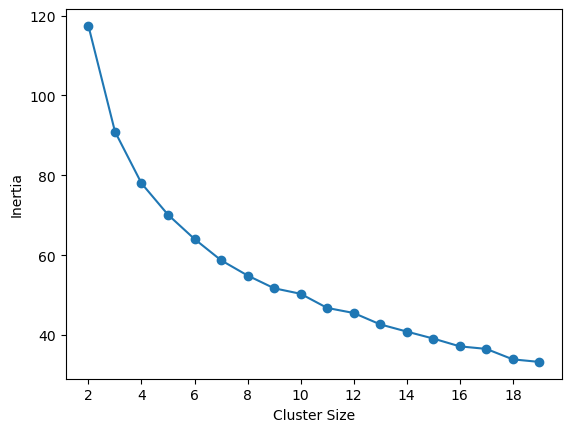

In [115]:
# Plot the graph of cluster size vs. intertia
plt.plot(cluster_sizes, inertia_values, '-o')
plt.xlabel('Cluster Size')
plt.ylabel('Inertia')
plt.xticks(range(min(cluster_sizes), max(cluster_sizes)+1, 2))
plt.show()


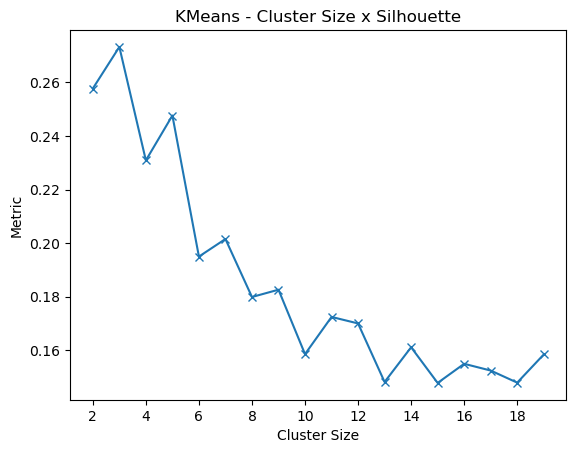

In [116]:
# Plot the graph of cluster size vs. intertia
plt.title('KMeans - Cluster Size x Silhouette')
plt.plot(cluster_sizes, silhouette_scores, '-x', label='Silhouette')
plt.xlabel('Cluster Size')
plt.ylabel('Metric')
plt.xticks(range(min(cluster_sizes), max(cluster_sizes)+1, 2))
plt.show()

In [117]:
# Run several times, to keep the best clustering
N_CLUSTERS = 8
REPETITIONS = 100

best_model = None
best_result = float('inf')

for _ in tqdm(range(REPETITIONS)):
    kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=20).fit(df_tag_overlap)
    if kmeans.inertia_ < best_result:
        if best_model is not None:
            print(best_model.inertia_, "->", kmeans.inertia_)
        best_model = kmeans
        best_result = kmeans.inertia_

clear_output()

In [118]:
# Now, match the clusters to the tags
df_tags_to_clusters = pd.DataFrame(columns=['Class', 'KM-Cluster'])
df_tags_to_clusters['Class'] = df_tag_overlap.columns
df_tags_to_clusters['KM-Cluster'] = best_model.labels_

In [119]:
# Order by cluster
df_tags_to_clusters.sort_values(by='KM-Cluster')

,Class,KM-Cluster
1,Asphalt,0
2,Automotive tire,0
33,Motorcycle,0
24,Helmet,0
5,Car,0
...,...,...
27,Lamp,6
23,Happy,7
41,Publication,7
18,Font,7


In [120]:
# faz um join entre df_sel_tags e df_tags_to_clusters
df_tags_info1 = df_sel_tags_stats.merge(df_tags_to_clusters, on='Class').sort_values(by='KM-Cluster').reset_index(drop=True)

In [121]:
#df_tags_info1[['Class', 'Increases Likes', 'Decreases Likes', 'KM-Cluster']].to_excel('temp_tags_influence1.xlsx', index=False)
df_tags_info1[['Class', 'Increases Likes', 'Decreases Likes', 'KM-Cluster']]

,Class,Increases Likes,Decreases Likes,KM-Cluster
0,Asphalt,False,True,0
1,Automotive tire,False,True,0
2,Motorcycle,False,True,0
3,Helmet,False,True,0
4,Car,False,True,0
...,...,...,...,...
56,Lamp,True,False,6
57,Happy,False,True,7
58,Publication,False,True,7
59,Font,False,True,7


In [122]:
(~df_tags_info1['Increases Likes'] & ~df_tags_info1['Decreases Likes']).sum()

0

In [123]:
df_tags_info1['Increases Likes'].sum(), df_tags_info1['Decreases Likes'].sum()

(33, 28)

## 4 - Clusterização Alternativa

Adotar apenas a tag ou a negação dela, para deixar a tag sempre com o mesmo efeito nos likes (greater).

In [124]:
def overlap_metric2(tagA, tagB, df, df_statistical_test):
    tagA_increases_likes = df_statistical_test.loc[df_statistical_test['Class'] == tagA, 'Increases Likes'].values[0]
    set_ids_with_tagA = df[df['Class'] == tagA]['ID'].unique()
    if tagA_increases_likes:
        setA = set_ids_with_tagA
    else:
        # remember that an ID may be associated with more than one tag/class
        set_ids_without_tagA = df[ ~df['ID'].isin(set_ids_with_tagA) ]
        set_ids_without_tagA = set_ids_without_tagA['ID'].unique()
        setA = set_ids_without_tagA

    tagB_increases_likes = df_statistical_test.loc[df_statistical_test['Class'] == tagB, 'Increases Likes'].values[0]
    set_ids_with_tagB = df[df['Class'] == tagB]['ID'].unique()
    if tagB_increases_likes:
        setB = set_ids_with_tagB
    else:
        # remember that an ID may be associated with more than one tag/class
        set_ids_without_tagB = df[ ~df['ID'].isin(set_ids_with_tagB) ]
        set_ids_without_tagB = set_ids_without_tagB['ID'].unique()
        setB = set_ids_without_tagB

    set_intersection = np.intersect1d(setA, setB)
    overlap_A_B = len(set_intersection) / len(setB)
    overlap_B_A = len(set_intersection) / len(setA)
    
    return overlap_A_B, overlap_B_A

In [125]:
overlap_metric1('Advertising', 'Flag', df)

(0.0, 0.0)

In [126]:
overlap_metric2('Advertising', 'Flag', df, df_sel_tags_stats)

(1.0, 0.03376844494892168)

In [127]:
df_tag_overlap2 = pd.DataFrame(columns=selected_tags, index=selected_tags)

for i in range(len(selected_tags)):
    tag1 = selected_tags[i]
    print(tag1)
    for j in range(i, len(selected_tags)):
        tag2 = selected_tags[j]
        overlap_tag1_tag2, overlap_tag2_tag1 = overlap_metric2(tag1, tag2, df, df_sel_tags_stats)
        df_tag_overlap2.loc[tag1,tag2] = overlap_tag1_tag2
        df_tag_overlap2.loc[tag2,tag1] = overlap_tag2_tag1

clear_output()

In [128]:
df_tag_overlap2 = df_tag_overlap2.reset_index().drop(columns='index')
df_tag_overlap2.head(10)

,Advertising,Asphalt,Automotive tire,Blazer,Blurred,Car,Chair,Cloud,Coat,Collar,...,Television presenter,Television program,Television studio,Textile,Tie,Tire,Vehicle,Wheel,Wind instrument,Youth
0,1.0,0.98173,0.981714,0.994624,0.972067,0.981808,0.991228,0.981427,0.985163,1.0,...,0.979167,1.0,1.0,0.982118,0.993517,0.98162,0.981363,0.981699,0.982148,0.982516
1,0.97588,1.0,0.982857,1.0,0.98324,0.981524,1.0,0.983785,1.0,1.0,...,1.0,1.0,1.0,0.97625,1.0,0.98564,0.990099,0.9837,0.97629,0.976029
2,0.975028,0.982015,1.0,0.997312,0.98324,0.979534,1.0,0.981722,1.0,1.0,...,1.0,1.0,1.0,0.975412,0.996759,0.991384,0.992429,0.990277,0.975453,0.975183
3,0.104994,0.106195,0.106,1.0,0.057728,0.105458,0.04386,0.10908,0.385757,0.475073,...,0.333333,0.341463,0.0,0.10394,0.435981,0.106548,0.107746,0.106091,0.103766,0.104907
4,0.148127,0.150728,0.150857,0.083333,1.0,0.149233,0.298246,0.149764,0.151335,0.029326,...,0.145833,0.121951,0.0,0.150042,0.090762,0.149914,0.149097,0.149271,0.149512,0.149746
5,0.980136,0.985727,0.984571,0.997312,0.977654,1.0,1.0,0.983785,0.997033,1.0,...,1.0,1.0,1.0,0.980441,0.998379,0.989374,0.996797,0.98799,0.980474,0.980259
6,0.032066,0.032544,0.032571,0.013441,0.063315,0.032405,1.0,0.033314,0.080119,0.002933,...,0.104167,0.121951,0.333333,0.031852,0.037277,0.032453,0.033197,0.032599,0.031799,0.031021
7,0.944665,0.952612,0.951429,0.994624,0.945996,0.94855,0.991228,1.0,0.991098,0.997067,...,1.0,1.0,1.0,0.945516,0.991896,0.954337,0.957775,0.953389,0.945328,0.944726
8,0.094211,0.096203,0.096286,0.349462,0.094972,0.095509,0.236842,0.098467,1.0,0.202346,...,0.541667,0.463415,0.0,0.09416,0.332253,0.096209,0.098136,0.096082,0.094003,0.094473
9,0.096765,0.097345,0.097429,0.435484,0.018622,0.09693,0.008772,0.100236,0.204748,1.0,...,0.104167,0.097561,0.0,0.095278,0.335494,0.097932,0.099301,0.097512,0.095119,0.096165


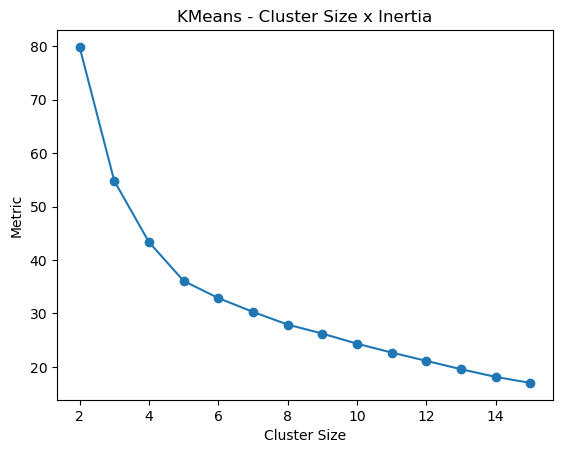

In [129]:
# Now, do multiple clustering iterations of KMeans (from sklearn), with different cluster sizes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_sizes = range(2, 16)
inertia_values = []
silhouette_scores = []

for size in cluster_sizes:
    kmeans = KMeans(n_clusters=size, n_init=20, random_state=11).fit(df_tag_overlap2)
    inertia_values.append(kmeans.inertia_)
    
    labels2 = kmeans.labels_
    silhouette_avg = silhouette_score(df_tag_overlap2, labels2)
    silhouette_scores.append(silhouette_avg)
    
    print(f'Cluster size: {size}, inertia: {kmeans.inertia_}, silhouette: {silhouette_avg}')

clear_output()

# Plot the graph of cluster size vs. intertia
plt.title('KMeans - Cluster Size x Inertia')
plt.plot(cluster_sizes, inertia_values, '-o', label='Inertia')
plt.xlabel('Cluster Size')
plt.ylabel('Metric')
plt.xticks(range(min(cluster_sizes), max(cluster_sizes)+1, 2))
plt.show()

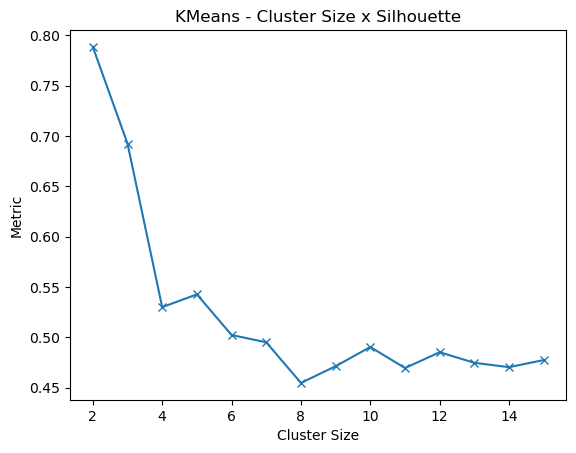

In [130]:
# Plot the graph of cluster size vs. intertia
plt.title('KMeans - Cluster Size x Silhouette')
plt.plot(cluster_sizes, silhouette_scores, '-x', label='Silhouette')
plt.xlabel('Cluster Size')
plt.ylabel('Metric')
plt.xticks(range(min(cluster_sizes), max(cluster_sizes)+1, 2))
plt.show()

In [131]:
# Run several times, to keep the best clustering
N_CLUSTERS = 7
REPETITIONS = 100

best_model = None
best_result = float('inf')

for _ in tqdm(range(REPETITIONS)):
    kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=20).fit(df_tag_overlap2)
    if kmeans.inertia_ < best_result:
        if best_model is not None:
            print(best_model.inertia_, "->", kmeans.inertia_)
        best_model = kmeans
        best_result = kmeans.inertia_

clear_output()

In [132]:
# Now, match the clusters to the tags
df_tags_to_clusters2 = pd.DataFrame(columns=['Class', 'KM-Cluster 2'])
df_tags_to_clusters2['Class'] = df_tag_overlap2.columns
df_tags_to_clusters2['KM-Cluster 2'] = best_model.labels_

# Sort by cluster
df_tags_to_clusters2.sort_values(by='KM-Cluster 2')

,Class,KM-Cluster 2
48,Spokesperson,0
3,Blazer,0
55,Tie,0
50,Suit,0
8,Coat,0
...,...,...
18,Font,5
26,Joy,5
10,Crowd,6
4,Blurred,6


In [133]:
# join with df_tags_info
df_tag_info2 = df_tags_info1.merge(df_tags_to_clusters2, on='Class')
df_tag_info2 = df_tag_info2.reset_index(drop=True)
df_tag_info2

,Class,P-Value - ts,P-Value - greater,P-Value - less,Increases Likes,Decreases Likes,KM-Cluster,KM-Cluster 2
0,Asphalt,4.925808e-05,0.999975,2.462904e-05,False,True,0,1
1,Automotive tire,8.201432e-07,1.000000,4.100716e-07,False,True,0,1
2,Motorcycle,3.910938e-06,0.999998,1.955469e-06,False,True,0,1
3,Helmet,5.538100e-04,0.999723,2.769050e-04,False,True,0,1
4,Car,7.300403e-03,0.996351,3.650202e-03,False,True,0,1
...,...,...,...,...,...,...,...,...
56,Lamp,4.756970e-03,0.002378,9.976240e-01,True,False,6,2
57,Happy,8.382797e-04,0.999581,4.191398e-04,False,True,7,1
58,Publication,1.357098e-07,1.000000,6.785489e-08,False,True,7,1
59,Font,5.831866e-20,1.000000,2.915933e-20,False,True,7,5


In [134]:
#df_tag_info2[['Class', 'Increases Likes', 'Decreases Likes', 'KM-Cluster', 'KM-Cluster 2']].sort_values(by='KM-Cluster 2').to_excel('temp_tags_influence2.xlsx', index=False)

## 5 - Para Uniformizar os IDs dos Clusters

In [135]:
# converte um cluster numérico (0, 1, 2) para uma letra (A, B, C)
def cluster_to_letter(cluster):
    return chr(cluster + 65)

#df_tag_info2['KM-Cluster 2'] = df_tag_info2['KM-Cluster 2'].apply(cluster_to_letter)

In [136]:
#df_tag_info2

In [137]:
# outra forma de aproximar os clusters:
# para cada cluster c2 de 'KM-Cluster 2', encontra o identificador numérico do cluster de 'KM-Cluster' que tem a maior interseção com c2
# e usa como rótulo, em 'KM-Cluster 2' (no lugar de c2), o mesmo número usado em 'KM-Cluster'
next_unused_cluster_id = df_tag_info2['KM-Cluster'].max() + 1
for c2 in df_tag_info2['KM-Cluster 2'].unique():
    set_cluster_2 = df_tag_info2[df_tag_info2['KM-Cluster 2'] == c2]['Class']
    max_intersection = 0
    max_intersection_cluster_1 = -1
    for c1 in df_tag_info2['KM-Cluster'].unique():
        set_cluster_1 = df_tag_info2[df_tag_info2['KM-Cluster'] == c1]['Class']
        set_intersection = np.intersect1d(set_cluster_1, set_cluster_2)
        if len(set_intersection) > max_intersection:
            max_intersection = len(set_intersection)
            max_intersection_cluster_1 = c1
    if max_intersection > 0:
        #df_tag_info2.loc[df_tag_info2['KM-Cluster 2'] == c2, 'KM-Cluster 2'] = max_intersection_cluster_1
        #df_tag_info2.loc[:, 'KM-Cluster 2'] = df_tag_info2['KM-Cluster 2'].replace(c2, max_intersection_cluster_1)
        df_tag_info2.loc[:, 'KM-Cluster 2'].replace(c2, max_intersection_cluster_1, inplace=True)
    else:
        df_tag_info2.loc[df_tag_info2['KM-Cluster 2'] == c2, 'KM-Cluster 2'] = next_unused_cluster_id
        next_unused_cluster_id += 1


In [138]:
df_tag_info2.sort_values(by='KM-Cluster')

,Class,P-Value - ts,P-Value - greater,P-Value - less,Increases Likes,Decreases Likes,KM-Cluster,KM-Cluster 2
0,Asphalt,4.925808e-05,0.999975,2.462904e-05,False,True,0,0
1,Automotive tire,8.201432e-07,1.000000,4.100716e-07,False,True,0,0
2,Motorcycle,3.910938e-06,0.999998,1.955469e-06,False,True,0,0
3,Helmet,5.538100e-04,0.999723,2.769050e-04,False,True,0,0
4,Car,7.300403e-03,0.996351,3.650202e-03,False,True,0,0
...,...,...,...,...,...,...,...,...
34,Shelving,3.950419e-03,0.998026,1.975209e-03,False,True,6,0
57,Happy,8.382797e-04,0.999581,4.191398e-04,False,True,7,0
58,Publication,1.357098e-07,1.000000,6.785489e-08,False,True,7,0
59,Font,5.831866e-20,1.000000,2.915933e-20,False,True,7,6


In [139]:
#df_tag_info2[['Class', 'KM-Cluster', 'KM-Cluster 2']].to_csv('temp_GoogleVision-geral.csv', index=False)

In [140]:
#pd.read_csv('temp_GoogleVision-geral.csv')

## 6 - Explorando Outras Ideias

In [141]:
df_tag_overlap3 = df_tag_overlap2.copy()
#df_tag_overlap3.head(10)
df_tag_overlap3.iloc[0:10, 0:15]

,Advertising,Asphalt,Automotive tire,Blazer,Blurred,Car,Chair,Cloud,Coat,Collar,Crowd,Curtain,Dress shirt,Entertainment,Event
0,1.0,0.98173,0.981714,0.994624,0.972067,0.981808,0.991228,0.981427,0.985163,1.0,0.996564,1.0,1.0,0.957516,0.978921
1,0.97588,1.0,0.982857,1.0,0.98324,0.981524,1.0,0.983785,1.0,1.0,0.982818,1.0,1.0,0.993464,0.991568
2,0.975028,0.982015,1.0,0.997312,0.98324,0.979534,1.0,0.981722,1.0,1.0,0.989691,1.0,1.0,0.996732,0.994941
3,0.104994,0.106195,0.106,1.0,0.057728,0.105458,0.04386,0.10908,0.385757,0.475073,0.001718,0.206897,0.426471,0.019608,0.091906
4,0.148127,0.150728,0.150857,0.083333,1.0,0.149233,0.298246,0.149764,0.151335,0.029326,0.37457,0.137931,0.041176,0.30719,0.252951
5,0.980136,0.985727,0.984571,0.997312,0.977654,1.0,1.0,0.983785,0.997033,1.0,0.97079,1.0,1.0,0.993464,0.990725
6,0.032066,0.032544,0.032571,0.013441,0.063315,0.032405,1.0,0.033314,0.080119,0.002933,0.036082,0.172414,0.011765,0.075163,0.069983
7,0.944665,0.952612,0.951429,0.994624,0.945996,0.94855,0.991228,1.0,0.991098,0.997067,0.898625,1.0,0.997059,0.990196,0.961214
8,0.094211,0.096203,0.096286,0.349462,0.094972,0.095509,0.236842,0.098467,1.0,0.202346,0.030928,0.103448,0.2,0.075163,0.107083
9,0.096765,0.097345,0.097429,0.435484,0.018622,0.09693,0.008772,0.100236,0.204748,1.0,0.0,0.103448,0.638235,0.009804,0.032884


In [142]:
df_weights = df.loc[df['Class'].isin(selected_tags)].groupby('Class')['ID'].nunique() 
df_weights = 100.0 * df_weights / df_weights.sum()
df_weights

Class
Advertising        0.417809
Asphalt            0.554903
Automotive tire    0.574488
Blazer             2.428515
Blurred            3.505680
                     ...   
Tire               0.691996
Vehicle            1.005353
Wheel              0.594072
Wind instrument    0.019585
Youth              0.274187
Name: ID, Length: 61, dtype: float64

In [143]:
# multiply each column by the weight of the corresponding tag (used as columns labels)
# i.e., each row is multiplied by the array weight
df_tag_overlap3 = df_tag_overlap3.mul(df_weights, axis=1)
df_tag_overlap3.iloc[0:10, 0:15]

,Advertising,Asphalt,Automotive tire,Blazer,Blurred,Car,Chair,Cloud,Coat,Collar,Crowd,Curtain,Dress shirt,Entertainment,Event
0,0.417809,0.544765,0.563983,2.415459,3.407756,0.448665,0.737694,1.255775,2.167385,2.226139,3.786395,0.18932,2.219611,1.912782,7.579318
1,0.407731,0.554903,0.564639,2.428515,3.446925,0.448535,0.744222,1.258793,2.200026,2.226139,3.734169,0.18932,2.219611,1.984593,7.677242
2,0.407376,0.544923,0.574488,2.421987,3.446925,0.447626,0.744222,1.256153,2.200026,2.226139,3.760282,0.18932,2.219611,1.991122,7.703356
3,0.043868,0.058928,0.060896,2.428515,0.202376,0.048192,0.032641,0.139573,0.848675,1.057579,0.006528,0.03917,0.946599,0.03917,0.711581
4,0.061889,0.083639,0.086666,0.202376,3.50568,0.068196,0.221961,0.191629,0.332942,0.065283,1.423162,0.026113,0.091396,0.613657,1.95848
5,0.40951,0.546982,0.565624,2.421987,3.42734,0.456979,0.744222,1.258793,2.193498,2.226139,3.688471,0.18932,2.219611,1.984593,7.670714
6,0.013397,0.018058,0.018712,0.032641,0.221961,0.014808,0.744222,0.042626,0.176263,0.006528,0.137094,0.032641,0.026113,0.15015,0.541846
7,0.39469,0.528607,0.546584,2.415459,3.31636,0.433467,0.737694,1.27954,2.180441,2.219611,3.414284,0.18932,2.213083,1.978065,7.442225
8,0.039362,0.053383,0.055315,0.848675,0.332942,0.043645,0.176263,0.125992,2.200026,0.45045,0.117509,0.019585,0.443922,0.15015,0.82909
9,0.040429,0.054017,0.055971,1.057579,0.065283,0.044295,0.006528,0.128256,0.45045,2.226139,0.0,0.019585,1.416634,0.019585,0.254602
